In [822]:
import pandas as pd
import numpy as np
import sklearn
import matplotlib.pyplot as plt 
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer
from sklearn.model_selection import train_test_split, RandomizedSearchCV, KFold
from sklearn.neighbors import KNeighborsClassifier 
import joblib
from imblearn.over_sampling import SMOTE
from collections import Counter



In [823]:
sklearn.set_config(transform_output="default") 

LOAD DATASET 

In [824]:
df = pd.read_csv("framingham.csv")

In [825]:
df.head()

,male,age,education,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
0,1,39,4.0,0,0.0,0.0,0,0,0,195.0,106.0,70.0,26.97,80.0,77.0,0
1,0,46,2.0,0,0.0,0.0,0,0,0,250.0,121.0,81.0,28.73,95.0,76.0,0
2,1,48,1.0,1,20.0,0.0,0,0,0,245.0,127.5,80.0,25.34,75.0,70.0,0
3,0,61,3.0,1,30.0,0.0,0,1,0,225.0,150.0,95.0,28.58,65.0,103.0,1
4,0,46,3.0,1,23.0,0.0,0,0,0,285.0,130.0,84.0,23.10,85.0,85.0,0


In [826]:
df.shape

(4240, 16)


CHECK FOR NULL VALUES

In [827]:
df.isna().sum()

male                 0
age                  0
education          105
currentSmoker        0
cigsPerDay          29
BPMeds              53
prevalentStroke      0
prevalentHyp         0
diabetes             0
totChol             50
sysBP                0
diaBP                0
BMI                 19
heartRate            1
glucose            388
TenYearCHD           0
dtype: int64

In [828]:
df = df.drop("education", axis=1)

In [829]:
df.isna().sum()

male                 0
age                  0
currentSmoker        0
cigsPerDay          29
BPMeds              53
prevalentStroke      0
prevalentHyp         0
diabetes             0
totChol             50
sysBP                0
diaBP                0
BMI                 19
heartRate            1
glucose            388
TenYearCHD           0
dtype: int64

DROP COLUMNS THAT HAVE MISSING VALUES LESS THAN 60

In [830]:
df = df.dropna(subset=["cigsPerDay","BPMeds","totChol","BMI","heartRate"])

In [831]:
df.isna().sum()

male                 0
age                  0
currentSmoker        0
cigsPerDay           0
BPMeds               0
prevalentStroke      0
prevalentHyp         0
diabetes             0
totChol              0
sysBP                0
diaBP                0
BMI                  0
heartRate            0
glucose            339
TenYearCHD           0
dtype: int64

IMPUTE USING MEAN

In [832]:

imp_num = SimpleImputer()
df_num = df[["glucose"]].values
impute = imp_num.fit_transform(df_num)

df['glucose'] = impute


In [833]:
df

,male,age,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
0,1,39,0,0.0,0.0,0,0,0,195.0,106.0,70.0,26.97,80.0,77.000000,0
1,0,46,0,0.0,0.0,0,0,0,250.0,121.0,81.0,28.73,95.0,76.000000,0
2,1,48,1,20.0,0.0,0,0,0,245.0,127.5,80.0,25.34,75.0,70.000000,0
3,0,61,1,30.0,0.0,0,1,0,225.0,150.0,95.0,28.58,65.0,103.000000,1
4,0,46,1,23.0,0.0,0,0,0,285.0,130.0,84.0,23.10,85.0,85.000000,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4234,1,51,1,43.0,0.0,0,0,0,207.0,126.5,80.0,19.71,65.0,68.000000,0
4236,0,44,1,15.0,0.0,0,0,0,210.0,126.5,87.0,19.16,86.0,81.880032,0
4237,0,52,0,0.0,0.0,0,0,0,269.0,133.5,83.0,21.47,80.0,107.000000,0
4238,1,40,0,0.0,0.0,0,1,0,185.0,141.0,98.0,25.60,67.0,72.000000,0


In [834]:
df.isna().sum()

male               0
age                0
currentSmoker      0
cigsPerDay         0
BPMeds             0
prevalentStroke    0
prevalentHyp       0
diabetes           0
totChol            0
sysBP              0
diaBP              0
BMI                0
heartRate          0
glucose            0
TenYearCHD         0
dtype: int64

VISUALIZE RELATIONS

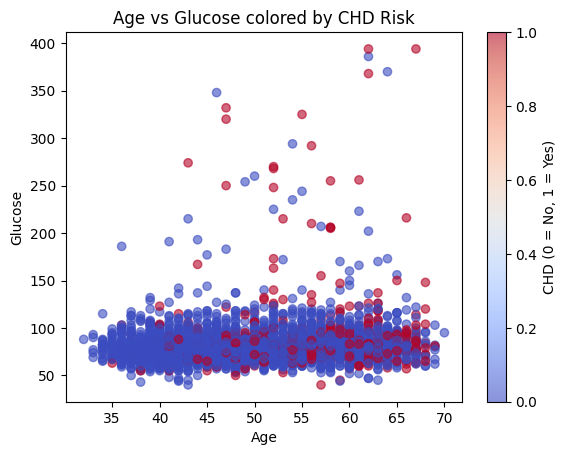

In [835]:
plt.scatter(df["age"], df["glucose"], c=df["TenYearCHD"], cmap="coolwarm", alpha=0.6)
plt.xlabel("Age")
plt.ylabel("Glucose")
plt.title("Age vs Glucose colored by CHD Risk")
plt.colorbar(label="CHD (0 = No, 1 = Yes)")
plt.show()



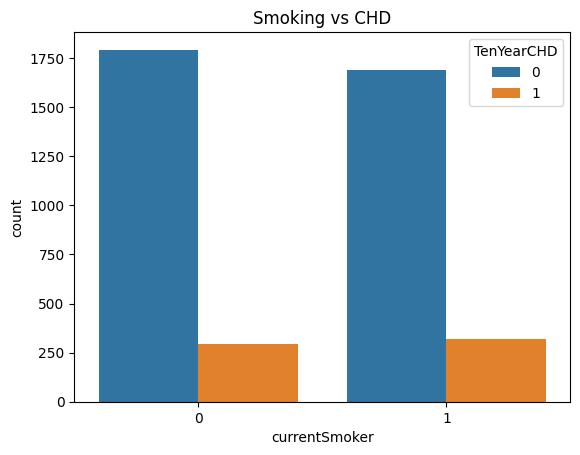

In [836]:

sns.countplot(x="currentSmoker", hue="TenYearCHD", data=df)
plt.title("Smoking vs CHD")
plt.show()


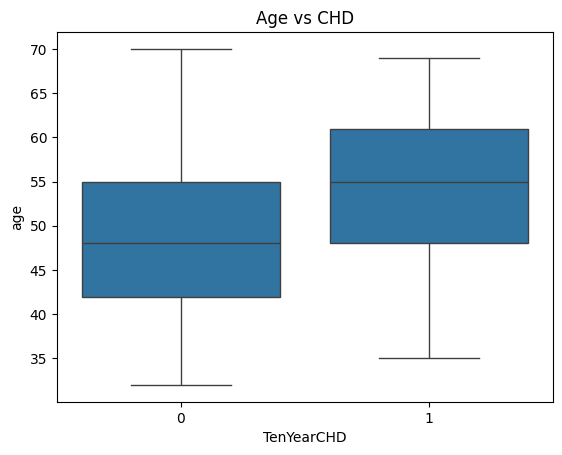

In [837]:

sns.boxplot(x="TenYearCHD", y="age", data=df)
plt.title("Age vs CHD")
plt.show()


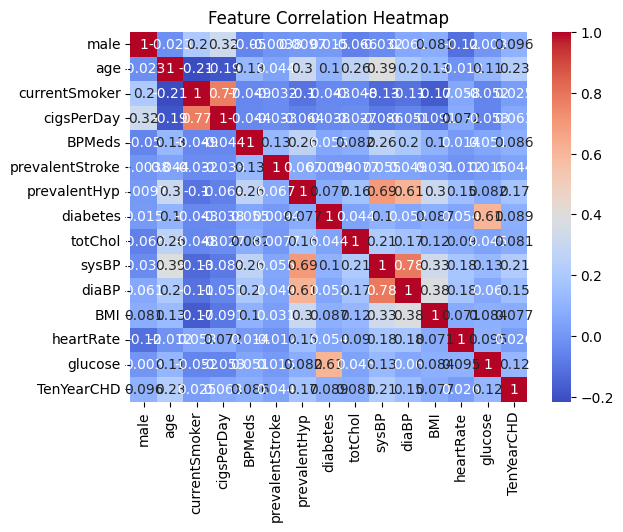

In [838]:
sns.heatmap(df.corr(), annot=True, cmap="coolwarm")
plt.title("Feature Correlation Heatmap")
plt.show()


DROP COLUMNS THAT ARE REDUNDANT, SHOWN IN THE HEATMAP ABOVE

In [839]:
df = df.drop(['diaBP','prevalentHyp','glucose','BPMeds','prevalentStroke'], axis=1)

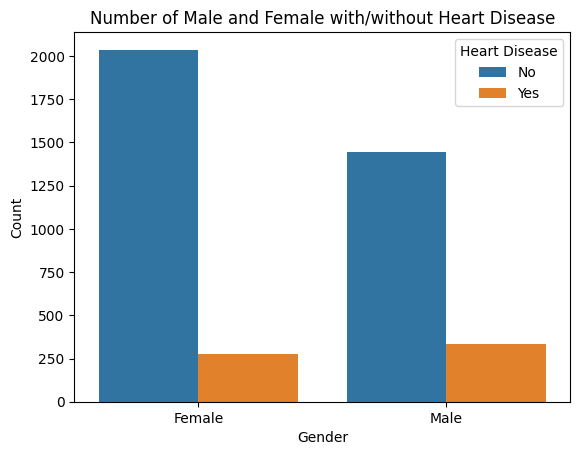

In [840]:
# Bar plot
sns.countplot(x="male", hue="TenYearCHD", data=df)

# Labels
plt.xticks([0, 1], ["Female", "Male"])
plt.xlabel("Gender")
plt.ylabel("Count")
plt.title("Number of Male and Female with/without Heart Disease")
plt.legend(title="Heart Disease", labels=["No", "Yes"])
plt.show()

In [841]:
X = df.drop("TenYearCHD", axis=1)
y = df["TenYearCHD"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2,random_state=42,stratify=y)

In [842]:
X.isnull().sum()

male             0
age              0
currentSmoker    0
cigsPerDay       0
diabetes         0
totChol          0
sysBP            0
BMI              0
heartRate        0
dtype: int64

In [843]:
X.tail()

,male,age,currentSmoker,cigsPerDay,diabetes,totChol,sysBP,BMI,heartRate
4234,1,51,1,43.0,0,207.0,126.5,19.71,65.0
4236,0,44,1,15.0,0,210.0,126.5,19.16,86.0
4237,0,52,0,0.0,0,269.0,133.5,21.47,80.0
4238,1,40,0,0.0,0,185.0,141.0,25.60,67.0
4239,0,39,1,30.0,0,196.0,133.0,20.91,85.0


In [844]:
scaler = StandardScaler()

X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.fit_transform(X_test)

joblib.dump(scaler, 'scaler.joblib')

['scaler.joblib']

In [845]:
import xgboost as xgb
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import f1_score, make_scorer

# Assume X_train_scaled and y_train are your final 9-feature scaled training data

# 1. Calculate the weight (3596 / 644 = 5.58)
scale_pos_weight_value = 3596 / 644

# 2. Initialize the XGBoost Classifier
xgb_clf = xgb.XGBClassifier(
    objective='binary:logistic',        # For binary classification
    n_estimators=100,                   # Number of boosting rounds (trees)
    learning_rate=0.1,                  # Step size shrinkage to prevent overfitting
    use_label_encoder=False,            # Suppress a future warning
    eval_metric='logloss',              # Metric for monitoring performance
    
    # --- IMBALANCE FIX ---
    scale_pos_weight=scale_pos_weight_value, # Tells the model to give more weight to the minority class (1)
    
    random_state=42                     # Ensures deterministic, repeatable results
)

# 3. Train the model
# XGBoost is not sensitive to scaling but uses the same X_train data
xgb_clf.fit(X_train_scaled, y_train) 

# 4. Evaluate using the F1 score (the desired metric)
y_pred = xgb_clf.predict(X_test_scaled)
f1 = f1_score(y_test, y_pred)

print(f"XGBoost F1 Score: {f1:.4f}")



C:\Users\nazih\AppData\Roaming\Python\Python313\site-packages\xgboost\training.py:183: UserWarning: [23:29:31] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


XGBoost F1 Score: 0.2946


In [846]:
from sklearn.model_selection import RandomizedSearchCV, KFold

# The custom F1 scoring we used before is still the best approach
f1_scorer = make_scorer(f1_score) 

# Define parameters to search over
xgb_params = {
    'max_depth': range(3, 10),              # Depth of trees
    'min_child_weight': range(1, 6),        # Minimum sum of instance weight needed in a child
    'gamma': [i/10.0 for i in range(0, 5)], # Minimum loss reduction required to make a further partition
    'subsample': [i/10.0 for i in range(6, 10)], # Subsample ratio of the training instances
    # 'scale_pos_weight' is fixed to handle imbalance!
}

# Initialize the classifier with the fixed imbalance setting
xgb_base = xgb.XGBClassifier(
    objective='binary:logistic',
    scale_pos_weight=scale_pos_weight_value, # Fixed imbalance
    use_label_encoder=False,
    eval_metric='logloss',
    random_state=42
)

kf = KFold(n_splits=5, shuffle=True, random_state=42)

xgb_cv = RandomizedSearchCV(
    estimator=xgb_base,
    param_distributions=xgb_params,
    scoring=f1_scorer, # Optimize for F1 score
    n_iter=50,         # Increase the number of iterations for a better search
    cv=kf,
    random_state=42,
    verbose=0
)

# Fit on the original, non-SMOTE, scaled training data!
# XGBoost handles imbalance internally, so SMOTE is not needed here.
xgb_cv.fit(X_train_scaled, y_train)

print(f"Best XGBoost F1 Score: {xgb_cv.best_score_:.4f}")
print("Best Parameters:", xgb_cv.best_params_)

# Now, save and deploy xgb_cv.best_estimator_
final_model = xgb_cv.best_estimator_
joblib.dump(final_model, "xgb_model.joblib")

C:\Users\nazih\AppData\Roaming\Python\Python313\site-packages\xgboost\training.py:183: UserWarning: [23:29:32] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
C:\Users\nazih\AppData\Roaming\Python\Python313\site-packages\xgboost\training.py:183: UserWarning: [23:29:32] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
C:\Users\nazih\AppData\Roaming\Python\Python313\site-packages\xgboost\training.py:183: UserWarning: [23:29:32] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
C:\Users\nazih\AppData\Roaming\Python\Python313\site-packages\xgboost\training.py:183: UserWarning: [23:29:32] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.

Best XGBoost F1 Score: 0.3255
Best Parameters: {'subsample': 0.8, 'min_child_weight': 5, 'max_depth': 3, 'gamma': 0.1}


C:\Users\nazih\AppData\Roaming\Python\Python313\site-packages\xgboost\training.py:183: UserWarning: [23:30:35] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


['xgb_model.joblib']

In [856]:
# Create a DataFrame for a new patient (single row example)
new_data = pd.DataFrame({
    'male': [0],
    'age': [61],
    'currentSmoker': [1],
    'cigsPerDay': [30.0],
    'diabetes': [0],
    'totChol': [225.0],
    'sysBP': [150.0],
    'BMI': [28.85],
    'heartRate': [65.0],
}) # Ensure column order matches the training data

In [857]:
# Create a DataFrame for a new patient (single row example)
new_data2 = pd.DataFrame({
    'male': [1],
    'age': [39],
    'currentSmoker': [0],
    'cigsPerDay': [1],
    'diabetes': [0],
    'totChol': [195.0],
    'sysBP': [106.0],
    'BMI': [26.97],
    'heartRate': [80.0],
}) # Ensure column order matches the training data

In [859]:
# Scale the new data
X_scaled = scaler.transform(new_data)
# Make the prediction
prediction = final_model.predict(X_scaled)

# If you want the probability scores (for classification models)
probability = final_model.predict_proba(X_scaled)

print(f"Prediction (0=No CHD, 1=CHD): {prediction[0]}")
print(f"Prediction Probability (No CHD, CHD): {probability[0]}")

Prediction (0=No CHD, 1=CHD): 1
Prediction Probability (No CHD, CHD): [0.2680292 0.7319708]


Value Counts of the Target Variable:
TenYearCHD
0    3596
1     644
Name: count, dtype: int64

Percentage Distribution:
TenYearCHD
0    84.81
1    15.19
Name: proportion, dtype: float64


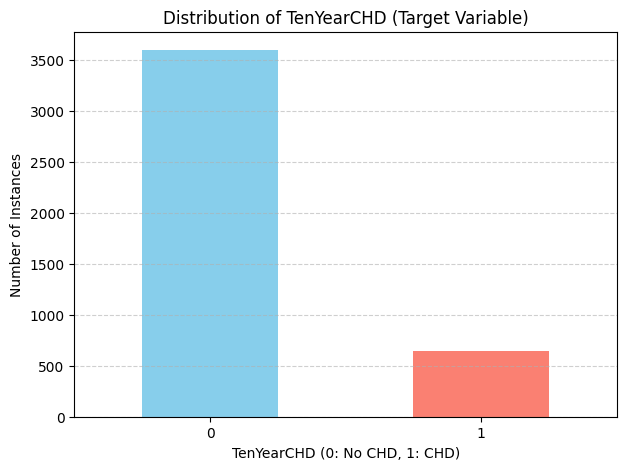

In [854]:
import pandas as pd
import matplotlib.pyplot as plt

# --- 1. Load the data ---
# REPLACE 'framingham.csv' with the actual name of your data file
df = pd.read_csv('framingham.csv')


# --- 2. Check the distribution of the target variable ---
TARGET_COLUMN = 'TenYearCHD'

# Get the count of each class (0 and 1)
target_counts = df[TARGET_COLUMN].value_counts()

# Get the percentage of each class
target_percentage = df[TARGET_COLUMN].value_counts(normalize=True) * 100

print("Value Counts of the Target Variable:")
print(target_counts)
print("\nPercentage Distribution:")
print(target_percentage.round(2))

# --- 3. Visualize the distribution (Optional but recommended) ---
plt.figure(figsize=(7, 5))
target_counts.plot(kind='bar', color=['skyblue', 'salmon'])
plt.title('Distribution of TenYearCHD (Target Variable)')
plt.xlabel('TenYearCHD (0: No CHD, 1: CHD)')
plt.ylabel('Number of Instances')
plt.xticks(rotation=0)
plt.grid(axis='y', linestyle='--', alpha=0.6)
plt.show()

In [855]:
TARGET_COLUMN = 'TenYearCHD'
target_counts = df[TARGET_COLUMN].value_counts()
target_percentage = df[TARGET_COLUMN].value_counts(normalize=True) * 100

print("Value Counts of the Target Variable:")
print(target_counts)
print("\nPercentage Distribution:")
print(target_percentage.round(2))

Value Counts of the Target Variable:
TenYearCHD
0    3596
1     644
Name: count, dtype: int64

Percentage Distribution:
TenYearCHD
0    84.81
1    15.19
Name: proportion, dtype: float64
